Please enter the data in .csv format (data must end in '.csv'):  740_Project_Prototype_Data.csv
Is there a new individual to be added to the conference list? (Y/N): y

Please enter the attendee name:  William brasic
Please enter the attendee age:  23
Please enter the attendee room number:  204
Please enter whether the attendee is vaccinated: (Y/N/NA)  na

Is there a new individual to be added to the conference list? (Y/N): n

Based only on the average age the choosen conference room is Joyous Occasion.

This conference has below a 50% vaccination rate.
It will will be moved to Enthusiastic Event Room.
Based on this newly selected room there will be approximately 15.35 sqft per person.



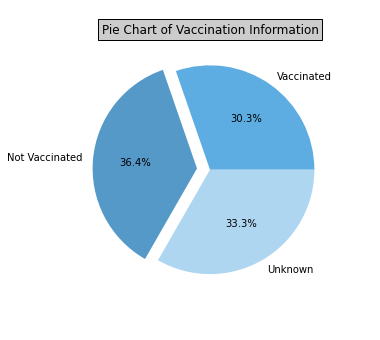

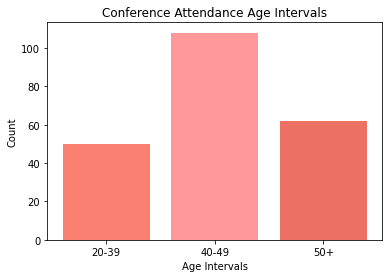

In [1]:
## importing required modules ##
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
%matplotlib inline

## defining function to choose room ##
def room_chooser(mean_age):
    
    '''
    
    1. Choose a conference room based on the mean_age argument.
    2. The mean_age is the average of all ages in the age vector.
    
    '''
    
    if (mean_age >= 20 and mean_age < 40):
        event_conference = conference_sqft[1500]
    elif (mean_age >= 40 and mean_age < 49):
        event_conference = conference_sqft[2500]
    elif (mean_age > 50):
        event_conference = conference_sqft[3500]
    return event_conference

## defining function to calculate the sqft available per person ##
def sqft_per_person(records):
    '''
    
    1. 'records' argument takes in the number of observations...best to enter len(df)
    2. The sqft per person will be calculated based on the choosen room.
    
    '''
    for k, v in conference_sqft.items():
        if (v == choosen_room):
            choosen_room_sqft = k
            
    return round(choosen_room_sqft / records, 2)

## dictionary of information regarding conference rooms ##
conference_sqft = {1500: 'Happy Moment', 2500: 'Joyous Occasion', 3500: 'Enthusiastic Event Room'}

## prompting user to enter .csv file with data for conference ##
input_file = ''
while not (input_file.endswith('.csv')) or not(os.path.exists(input_file)):
    input_file = input("Please enter the data in .csv format (data must end in '.csv'):  ")
    
    ## ending program if user enters nothing ##
    if (input_file == ''):
        sys.exit('The program has ended.')
    
    ## telling the user the file does not exist if condition is met ##
    elif not (os.path.exists(input_file)):
        print('The file does not exist.')

## reading the file into a pandas dataframe ##
df = pd.read_csv(input_file)

## removing blank spaces in column names; replacing them with a '_' ##
df.columns = df.columns.str.replace(' ', '_')

## droping all records who did not RSVP ##
df.drop(df[df.RSVP == 'N'].index, inplace = True)

## reindex the dataframe since observations were deleted ##
df.reset_index(drop = True, inplace = True)

## adding new records if user says it is needed ##
while True:
    new_record = input('Is there a new individual to be added to the conference list? (Y/N): ')
    print()
    if (new_record.lower() == 'y'):

        attendee = input('Please enter the attendee name:  ').title()
        age = int(input('Please enter the attendee age:  ').strip())
        room_number = int(input('Please enter the attendee room number:  ').strip())
        vaccinated = input('Please enter whether the attendee is vaccinated: (Y/N/NA)  ').upper().strip()

        new_attendee = {'Attendee': attendee, 
                        'Age': age, 
                        'Room_Number': room_number,
                        'Vaccinated': vaccinated, 
                        'RSVP': 'Y'}
        df = df.append(new_attendee, ignore_index = True)
        
        if (vaccinated == 'NA'):
            df.replace(to_replace = 'NA', value = np.NaN, inplace = True)
        
        print()

    else:
        break
        
## replacing the columns with that have 'Y' or 'No' with 1 and 0 ##
df.RSVP.replace(('Y', 'N'), (1, 0), inplace  = True)
df.Vaccinated.replace(('Y', 'N'), (1, 0), inplace = True)

## imputting median age for all records with NA value for age ##
df.Age.fillna(df.Age.median(), inplace = True)

## changing Age vector from floats to integers ##
df.Age = df.Age.astype('int')

## creating final dataframe as a new .csv file ##
df.to_csv('740_Project_Prototype_Data_Updated.csv', index = False)

## using room chooser function to determine room ##
choosen_room = room_chooser(round(df.Age.mean(), 2))
print(f'Based only on the average age the choosen conference room is {choosen_room}.')
print()

## calculation the proportion of those individuals attending who are vaccinated ##
proportion_vaccinated = round(((df.Vaccinated) == 1).sum() / len(df), 3)

## series of conditionals to potentially upgrade the room if needed ##
if (proportion_vaccinated < 0.50 and choosen_room != conference_sqft[3500]):
    print('This conference has below a 50% vaccination rate.')

    if (choosen_room == conference_sqft[1500]):
        choosen_room = conference_sqft[2500]

    elif (choosen_room == conference_sqft[2500]):
        choosen_room = conference_sqft[3500]
        
    print(f'''It will will be moved to {choosen_room}.
Based on this newly selected room there will be approximately {sqft_per_person(len(df))} sqft per person.
''')

else:
    print(f'''The conference will stay at {choosen_room} and there will be 
approximatley {sqft_per_person(len(df))} sqft per person.
    ''')

## labels and data for pie chart to subsequently be created ##
pie_chart_labels = ['Vaccinated', 'Not Vaccinated', 'Unknown'] 
pie_chart_data = [
    proportion_vaccinated * 100, 
    round(((df.Vaccinated) == 0).sum() / len(df) * 100, 3),
    round(df.Vaccinated.isna().sum() / len(df), 3) * 100
    ]

## creation of the pie chart ##
plt.figure(figsize = (6, 6))
plt.pie(pie_chart_data, labels = pie_chart_labels, autopct='%.1f%%', radius = 0.8, 
        explode = [0, 0.1, 0], colors = ['#5DADE2', '#5499C7', '#AED6F1'])
plt.title('Pie Chart of Vaccination Information', bbox = {'facecolor':'0.8'}, y = 0.9)
plt.show()

## labels and data for bar chart to subsequently be created ##
age_interval_counter = {'20-39': 0, '40-49': 0, '50+': 0}
for i in df.Age:
    if (i >= 20 and i < 40):
        age_interval_counter['20-39'] += 1
    elif (i >= 40 and i < 49):
        age_interval_counter['40-49'] += 1
    elif (i > 50):
        age_interval_counter['50+'] += 1

## creation of the bar chart ##
plt.bar(age_interval_counter.keys(), age_interval_counter.values(), color = ['#FA8072', '#FF9999', '#EC7063'])
plt.title('Conference Attendance Age Intervals')
plt.ylabel('Count')
plt.xlabel('Age Intervals')
plt.show()